In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Постановка задачи

*Задание 11*

Дано: 

$$ \{x^1, \ldots, x^M\}  \in R^2$$
$$ \{y^1, \ldots, y^N\}  \in R^2$$

Обозначим:
$$ X = \{x^1, \ldots, x^M\}  \in R^2$$
$$ Y = \{y^1, \ldots, y^N\}  \in R^2$$

Пусть  $conv(X), conv(Y)$ - выпуклые оболочки множеств $X$ и $Y$

Найти: множество крайних точек 
$$Ext(conv(X) + conv(Y))$$



# Python

## Входные данные

Зададим множество $X$

In [2]:
X = np.array([[0,3],
              [1,1],
              [2,2],
              [4,4],
              [0,0],
              [1,2],
              [3,1],
              [3,3]])

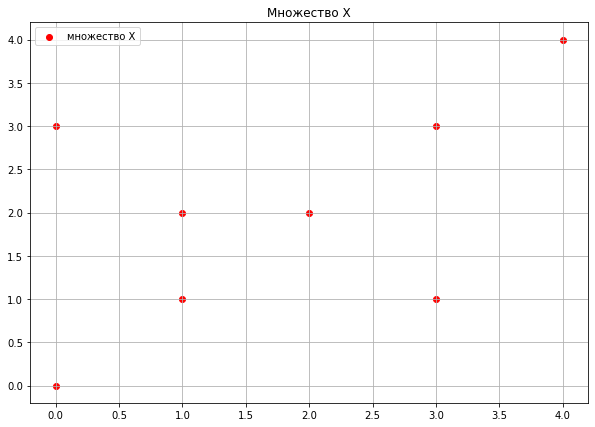

In [3]:
%matplotlib inline
plt.figure(figsize=(10,7))
plt.title('Множество X')
plt.scatter(X[:, 0], X[:, 1], c='red', label = 'множество X')
plt.legend()
plt.grid()

Зададим множество $Y$

In [4]:
Y = np.array([[0,0],
              [0,4],
              [-4,0],
              [5,0],
              [0,-6],
              [1,0]])

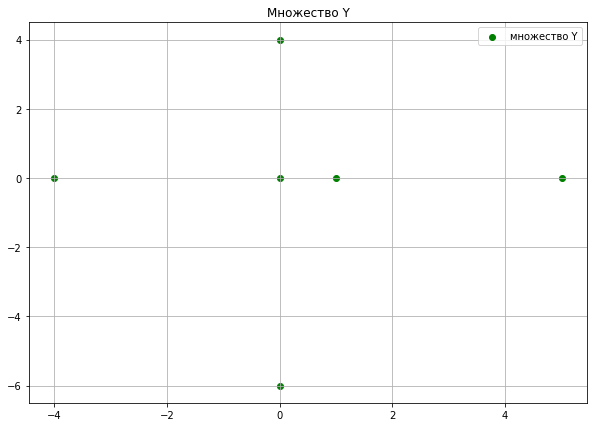

In [5]:
%matplotlib inline
plt.figure(figsize=(10,7))
plt.title('Множество Y')
plt.scatter(Y[:, 0], Y[:, 1], c='green', label = 'множество Y')
plt.legend()
plt.grid()

## Алгебраическая сумма Минковского

Согласно лемме:
$$ conv(X) + conv(Y) = conv\{x^i + y^j, i= 1 \ldots M, j = 1 \ldots N\}$$

Вычислим алгебраическую сумму Минковского двух множеств:

In [6]:
def Minkovsky_sum(X, Y):
    result = []
    for x in X:
        for y in Y:
            result.append((x + y))
    return np.unique(np.array(result.copy()), axis=0)

In [7]:
Z = Minkovsky_sum(X, Y)
Z

array([[-4,  0],
       [-4,  3],
       [-3,  1],
       [-3,  2],
       [-2,  2],
       [-1,  1],
       [-1,  3],
       [ 0, -6],
       [ 0, -3],
       [ 0,  0],
       [ 0,  3],
       [ 0,  4],
       [ 0,  7],
       [ 1, -5],
       [ 1, -4],
       [ 1,  0],
       [ 1,  1],
       [ 1,  2],
       [ 1,  3],
       [ 1,  5],
       [ 1,  6],
       [ 2, -4],
       [ 2,  1],
       [ 2,  2],
       [ 2,  6],
       [ 3, -5],
       [ 3, -3],
       [ 3,  1],
       [ 3,  2],
       [ 3,  3],
       [ 3,  5],
       [ 3,  7],
       [ 4, -2],
       [ 4,  1],
       [ 4,  3],
       [ 4,  4],
       [ 4,  8],
       [ 5,  0],
       [ 5,  3],
       [ 5,  4],
       [ 6,  1],
       [ 6,  2],
       [ 7,  2],
       [ 8,  1],
       [ 8,  3],
       [ 9,  4]])

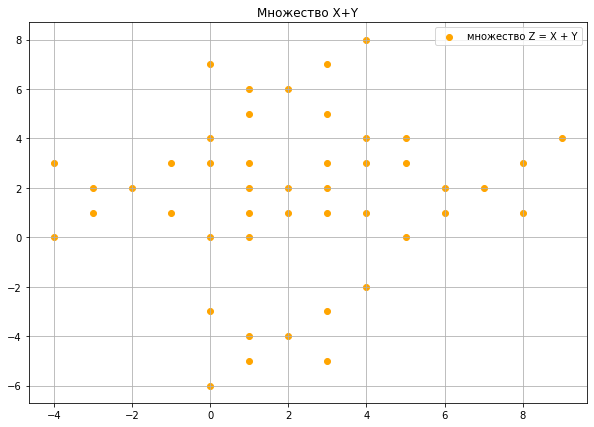

In [8]:
%matplotlib inline
plt.figure(figsize=(10,7))
plt.title('Множество X+Y')
plt.scatter(Z[:, 0], Z[:, 1], c='orange', label = 'множество Z = X + Y')
plt.legend()
plt.grid()

## Алгортим QuickHull2D

Множество точек разбивается на два подмножества, каждое из которых будет содержать одну из ломаных, соединение которых дает многоугольник выпуклой оболочки.

1.Возьмем две крайние точки множества $S$ — левую $L$ и правую $R$. Проведем прямую через них. Обозначим через $S1$ подмножество точек, расположенных выше или на прямой, проходящей через точки $L$ и $R$, а через $S2$ — подмножество точек, расположенных ниже или на той же прямой.

2.Рассмотрим верхнее подмножество $S1$. Выберем точку $P_i$, имеющую наибольшее расстояние от прямой $LR$ (треугольник $LP_iR$ имеет наибольшую площадь). Если таких точек несколько, выбираем ту, у которой угол $P_iLR$ наибольший. Точка $P_i$ является вершиной выпуклой оболочки множества. 

В самом деле, если через точку $P_i$ провести прямую, параллельную прямой ЛП, то выше этой прямой не окажется ни одной точки множества $S$. Возможно, на построенной прямой окажутся другие точки, но, согласно сделанному выбору, $P_i$ из них самая левая. Т. о. Точка $P_i$ не может быть представлена выпуклой комбинацией двух других точек множества $S$.Построим прямые $LP_i$ и $P_iR$. Точки, расположенные справа от обеих прямых, могут быть исключены из дальнейшего рассмотрения, поскольку они являются внутренними точками треугольника $LP_iR$, то есть не принадлежат $CH(S)$ — границе выпуклой оболочки.

3.Теперь рассмотрим подмножество точек $S11$, расположенных слева от прямой $LP_i$ или на ней, и подмножество точек $S12$, расположенных слева от прямой $P_iR$ или на ней. Для каждого из подмножеств строим выпуклую оболочку. Выпуклая оболочка множества $S1$ образуется склейкой упорядоченных списков вершин $CH(S11)$ и $CH(S12)$.

4.Решаем задачу для $S2$.

In [9]:
def qhull(S):
    link = lambda a,b: np.concatenate((a,b[1:])) 
    edge = lambda a,b: np.concatenate(([a],[b])) 
    
    def dome(S,base): 
        L, R = base # левая и правая крайние точки
        dists = np.dot(S-L, np.dot(((0,-1),(1,0)),(R-L))) # вычисялем расстояния 
        outer = np.repeat(S, dists>0, axis=0) # верхнее подмножество 
        
        if len(outer):
            Pi = S[np.argmax(dists)] # точка Pi с наибольшим расстоянием
            # считаем слева от прямой LP_i и справа от P_iR 
            return link(dome(outer, edge(L, Pi)),
                        dome(outer, edge(Pi, R)))
        else:
            return base

    if len(S) > 2:
        axis = S[:,0]
        base = np.take(S, [np.argmin(axis), np.argmax(axis)], axis=0) # береём две крайние точки мн-ва S
        # решаем сначала для подмножества S1, потом для S2 (выше и ниже прямой)
        return link(dome(S, base),
                    dome(S, base[::-1]))
    else:
        return('Not possible, here must be at least three points to form a hull')

In [10]:
hull = qhull(Z)
hull[:-1]

array([[-4,  0],
       [-4,  3],
       [ 0,  7],
       [ 4,  8],
       [ 9,  4],
       [ 8,  1],
       [ 3, -5],
       [ 0, -6]])

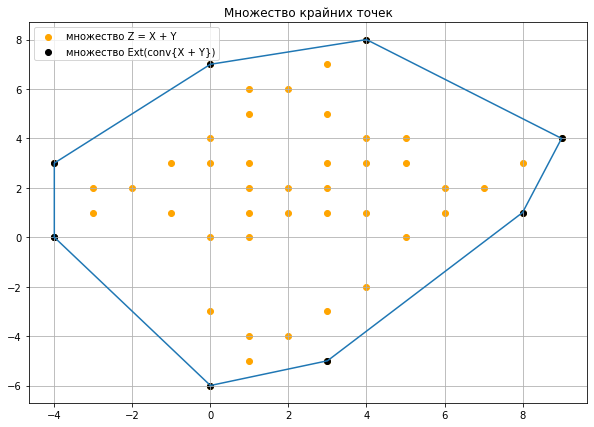

In [11]:
%matplotlib inline
plt.figure(figsize=(10,7))
plt.title('Множество крайних точек')
plt.scatter(Z[:, 0], Z[:, 1], c='orange', label = 'множество Z = X + Y')
plt.scatter(hull[:, 0], hull[:, 1], c='black', label = 'множество Ext(conv{X + Y})')
plt.plot(hull[:, 0], hull[:, 1])
plt.legend()
plt.grid()

# Cgal
Библиотека на c++

## Алгортим QuickHull2D

In [12]:
from CGAL.CGAL_Kernel import Point_2
from CGAL import CGAL_Convex_hull_2

In [13]:
L = []
for i in range(len(Z)):
    L.append(Point_2(int(Z[i][0]), int(Z[i][1])))
             
result = []
CGAL_Convex_hull_2.convex_hull_2(L, result)

for p in result:
    print(p)
    
hull[:-1]

-4 0
0 -6
3 -5
8 1
9 4
4 8
0 7
-4 3


array([[-4,  0],
       [-4,  3],
       [ 0,  7],
       [ 4,  8],
       [ 9,  4],
       [ 8,  1],
       [ 3, -5],
       [ 0, -6]])